# QCTO - Workplace Module

### Project Title: Please Insert your Project Title Here
#### Done By: Name and Surname

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.

This project aims to analyze daily price data for a selection of vegetables to uncover trends, seasonality, and other patterns. The primary goals are to conduct a thorough exploratory data analysis (EDA) and then to build and evaluate a time-series forecasting model capable of predicting short-term price movements. The significance of this work lies in its potential to provide actionable insights for stakeholders such as suppliers, retailers, and consumers, who can use this information for better pricing, inventory management, and budget planning.

* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.

The problem domain is retail and agricultural commodity analysis, focusing on price volatility and forecasting. Using the provided prices.csv dataset, which contains daily prices for vegetables like tomatoes, onions, and potatoes from 2023 onwards, this analysis seeks to answer several key questions :

•	What are the dominant seasonal patterns and long-term trends for key vegetable prices?
•	Which vegetables exhibit the most price volatility, and when do significant price spikes occur?
•	Is it possible to build a simple but reliable model to forecast prices for a 14-day horizon?
•	How strong are the price correlations between different vegetables?



---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for time series modeling
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Import libraries for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Import library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style("whitegrid")


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.

Obtained the data from Kaggle.
Data has the following characterirstics:



* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).

Dataset Characteristics:

•	Size and Scope: The dataset contains 287 rows and 11 columns, representing daily price observations for various vegetables starting from January 2023 .
•	Data Types: The data is primarily numerical. It includes one date column (Price Dates) and ten floating-point/integer columns representing the price of each vegetable (e.g., Tomato, Onion, Potato) . There are no categorical features aside from the vegetable names themselves, which are column headers.


---

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [4]:
# The 'prices.csv' file is in the same directory as the notebook,
# so we can load it directly using its filename.
file_path = 'prices.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows to preview the data
print("First 5 rows of the dataset:")
display(df.head())

# Display a summary of the dataset including data types and non-null values
print("\nDataset Information:")
df.info()

First 5 rows of the dataset:


Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  Garlic  \
0  01-01-2023                    35.0      18   22.0      20       30      50   
1  02-01-2023                    35.0      16   22.0      20       30      55   
2  03-01-2023                    35.0      16   21.0      20       30      55   
3  04-01-2023                    30.0      16   21.0      22       25      55   
4  08-01-2023                    35.0      16   20.0      21       25      55   

   Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0    25      8          45.0                    25  
1    25      7          40.0                    25  
2    25      7          40.0                    25  
3    25      7          40.0                    25  
4    22      6          35.0                    25


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [5]:
# Create a copy to preserve the original dataframe
df_clean = df.copy()

# 1. Standardize column names
df_clean.rename(columns=lambda x: x.strip().lower().replace(' ', '_').replace('(', '').replace(')', ''), inplace=True)

# 2. Convert 'price_dates' to datetime objects
# The dayfirst=True argument correctly interprets formats like 'DD-MM-YYYY'
df_clean['price_dates'] = pd.to_datetime(df_clean['price_dates'], dayfirst=True, errors='coerce')

# 3. Check for missing values after cleaning
print("Missing values per column:")
print(df_clean.isnull().sum())
print("\n" + "="*40 + "\n")

# 4. Set the date column as the index
df_clean.set_index('price_dates', inplace=True)

# Display the first 5 rows of the cleaned data
print("Data after cleaning (first 5 rows):")
display(df_clean.head())

# Display the new data types and info
print("\nCleaned Dataset Information:")
df_clean.info()


Missing values per column:
price_dates             0
bhindi_ladies_finger    0
tomato                  0
onion                   0
potato                  0
brinjal                 0
garlic                  0
peas                    0
methi                   0
green_chilli            0
elephant_yam_suran      0
dtype: int64


Data after cleaning (first 5 rows):


bhindi_ladies_finger  tomato  onion  potato  brinjal  garlic  \
price_dates                                                                 
2023-01-01                   35.0      18   22.0      20       30      50   
2023-01-02                   35.0      16   22.0      20       30      55   
2023-01-03                   35.0      16   21.0      20       30      55   
2023-01-04                   30.0      16   21.0      22       25      55   
2023-01-08                   35.0      16   20.0      21       25      55   

             peas  methi  green_chilli  elephant_yam_suran  
price_dates                                                 
2023-01-01     25      8          45.0                  25  
2023-01-02     25      7          40.0                  25  
2023-01-03     25      7          40.0                  25  
2023-01-04     25      7          40.0                  25  
2023-01-08     22      6          35.0                  25


Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 287 entries, 2023-01-01 to 2024-01-01
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bhindi_ladies_finger  287 non-null    float64
 1   tomato                287 non-null    int64  
 2   onion                 287 non-null    float64
 3   potato                287 non-null    int64  
 4   brinjal               287 non-null    int64  
 5   garlic                287 non-null    int64  
 6   peas                  287 non-null    int64  
 7   methi                 287 non-null    int64  
 8   green_chilli          287 non-null    float64
 9   elephant_yam_suran    287 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 24.7 KB


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.

The purpose of this section is to explore the cleaned price data to understand its underlying structure. We will analyze the statistical distribution of prices for key vegetables, visualize their price movements over time, and examine the correlation between them. The key vegetables selected for this initial analysis are Tomato, Onion, Potato, and Garlic.

* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.

Key EDA Questions:
•	What is the typical price range and distribution for each vegetable?
•	Are there visible trends or seasonal patterns in the price data?
•	How strongly do the prices of these key vegetables move together?


---


Summary Statistics for Vegetable Prices:


bhindi_ladies_finger      tomato       onion      potato     brinjal  \
count            287.000000  287.000000  287.000000  287.000000  287.000000   
mean              29.444251   16.006969   20.649826   18.585366   31.655052   
std                8.124815    0.118056   11.711204    2.726238   11.725421   
min               17.000000   16.000000    8.000000   12.000000   14.000000   
25%               22.000000   16.000000   12.000000   16.000000   25.000000   
50%               27.500000   16.000000   16.000000   20.000000   30.000000   
75%               33.000000   16.000000   25.000000   20.000000   35.000000   
max               60.000000   18.000000   57.000000   24.000000   80.000000   

           garlic        peas        methi  green_chilli  elephant_yam_suran  
count  287.000000  287.000000   287.000000    287.000000          287.000000  
mean   133.101045   66.658537    20.383275     44.122404           28.797909  
std     60.078331   33.302415   117.428417     12.796590            6.607973  
min     50.000000   22.000000     5.000000      0.130000           12.000000  
25%     85.000000   40.000000     8.000000     35.000000           25.000000  
50%    120.000000   60.000000    12.000000     40.000000           30.000000  
75%    165.000000   80.000000    16.000000     50.000000           30.000000  
max    290.000000  150.000000  2000.000000     90.000000           50.000000



--- Visualizations ---


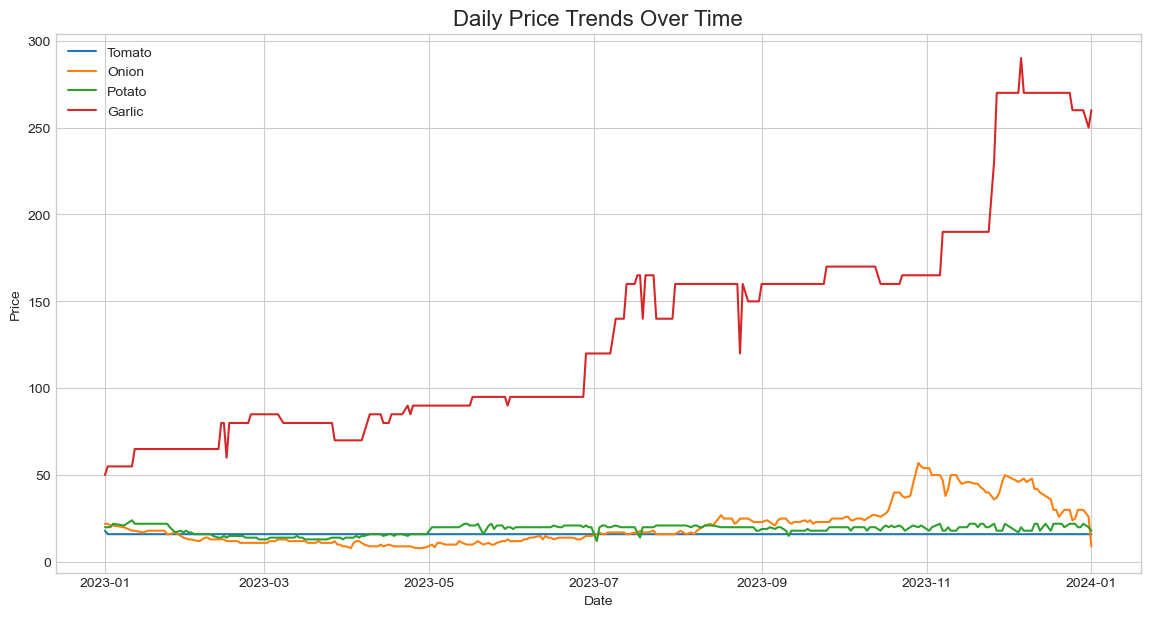

In [7]:
# --- 1. Summary Statistics ---

# Display summary statistics for a numerical overview of the cleaned data.
print("Summary Statistics for Vegetable Prices:")
display(df_clean.describe())


# --- 2. Visual Analysis ---

# Define the key vegetables for our analysis
vegetables_to_plot = ['tomato', 'onion', 'potato', 'garlic']

# Set up the plotting environment
plt.style.use('seaborn-v0_8-whitegrid')


# --- Plot 1: Price Distribution Histograms ---

print("\n\n--- Visualizations ---")
plt.figure(figsize=(14, 8))
plt.suptitle("Price Distribution for Key Vegetables", fontsize=16)

# Generate a histogram for each vegetable
for i, veg in enumerate(vegetables_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_clean[veg], bins=20, kde=True, color=f'C{i}')
    plt.title(f'Distribution of {veg.capitalize()} Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- Plot 2: Time Series Plot ---

plt.figure(figsize=(14, 7))

# Plot the price trend for each vegetable over time
for veg in vegetables_to_plot:
    plt.plot(df_clean.index, df_clean[veg], label=veg.capitalize())

plt.title('Daily Price Trends Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# --- Plot 3: Correlation Heatmap ---

# Calculate the correlation matrix for the selected vegetables
correlation_matrix = df_clean[vegetables_to_plot].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Vegetable Prices', fontsize=16)
plt.show()


Here are the key initial findings:

•	Price Range and Volatility:
o	Garlic is the most expensive and most volatile item, with a mean price of 133.10 and a massive standard deviation of 60.07. Its price has ranged from 50 to as high as 290.
o	Tomato prices are unusually stable, with a standard deviation of only 0.11. The price has barely moved from a mean of 16.00. This is a significant finding that we should investigate in the trend plots.
o	Onion and Brinjal also show notable price swings, with standard deviations around 11.7.
•	Data Quality and Outliers:
o	The count for all columns is 287, which confirms that our dataset has no missing values for these items.
o	Methi has a potential major outlier. Its maximum price is 2000, while its 75th percentile is only 16. This suggests a data entry error and is something that would need to be handled before modeling.
•	Central Tendency:
o	For most vegetables, the mean (average price) and median (50% mark) are relatively close, suggesting a fairly symmetrical price distribution. 

For items like Garlic, the mean is noticeably higher than the median (133 vs. 120), indicating that a few very high-price days are skewing the average upwards.



---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
